**Import Library dan Dataset**

In [291]:
import pandas as pd # Python library for data analysis and data frame
import numpy as np # Numerical Python library for linear algebra and computations

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 8); # setting the figuresize

from datetime import datetime, date #Library to deal with datetime columns

# time series analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# time series forecasting libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Neural network required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

# model evaluation libraries
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#for saving trained model
import pickle

import warnings
warnings.filterwarnings("ignore") # To prevent kernel from showing any warning

In [292]:
#Import Dataset
dataset = pd.read_csv('/content/Weather Data.csv')
dataset

,Date,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86.0,4.0,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87.0,4.0,8.0,101.24,Fog
2,"1/1/2012 2:00,-1.8,-3.4,89,7,4,101.26,""Freezin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1/1/2012 3:00,-1.5,-3.2,88,6,4,101.27,""Freezin...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/1/2012 4:00,-1.5,-3.3,88.0,7.0,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81.0,30.0,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83.0,24.0,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93.0,28.0,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89.0,28.0,9.7,99.91,Snow


In [293]:
df = dataset[['Date', 'Wind Speed_km/h']]
df

,Date,Wind Speed_km/h
0,1/1/2012 0:00,4.0
1,1/1/2012 1:00,4.0
2,"1/1/2012 2:00,-1.8,-3.4,89,7,4,101.26,""Freezin...",NaN
3,"1/1/2012 3:00,-1.5,-3.2,88,6,4,101.27,""Freezin...",NaN
4,1/1/2012 4:00,7.0
...,...,...
8779,12/31/2012 19:00,30.0
8780,12/31/2012 20:00,24.0
8781,12/31/2012 21:00,28.0
8782,12/31/2012 22:00,28.0


In [294]:
df.describe(include = 'all')

,Date,Wind Speed_km/h
count,8784,8412.000000
unique,8784,NaN
top,1/1/2012 0:00,NaN
freq,1,NaN
mean,NaN,14.867451
std,NaN,8.643986
min,NaN,0.000000
25%,NaN,9.000000
50%,NaN,13.000000
75%,NaN,20.000000


In [295]:
print(f'Time period start : {df.Date.min()}\nTime period end : {df.Date.max()}')

Time period start : 1/1/2012 0:00
Time period end : 9/9/2012 9:00


**Preprocessing Data and Visualization**

In [296]:
df.duplicated().sum()

0

In [297]:
# Null values check
df.isnull().sum()

Date                 0
Wind Speed_km/h    372
dtype: int64

In [298]:
y = df.dropna()

In [299]:
y

,Date,Wind Speed_km/h
0,1/1/2012 0:00,4.0
1,1/1/2012 1:00,4.0
4,1/1/2012 4:00,7.0
5,1/1/2012 5:00,9.0
6,1/1/2012 6:00,7.0
...,...,...
8779,12/31/2012 19:00,30.0
8780,12/31/2012 20:00,24.0
8781,12/31/2012 21:00,28.0
8782,12/31/2012 22:00,28.0


In [300]:
# Converting year column to datetime format
y['Date'] = pd.to_datetime(y['Date'], format = '%m/%d/%Y %H:%M')

In [301]:
y = y.resample('d', on='Date').mean()

In [302]:
y

,Wind Speed_km/h
Date,
2012-01-01,13.227273
2012-01-02,31.416667
2012-01-03,22.041667
2012-01-04,10.500000
2012-01-05,12.125000
...,...
2012-12-27,34.916667
2012-12-28,18.333333
2012-12-29,8.272727


In [303]:
y.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq='D')

In [304]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2012-01-01 to 2012-12-31
Freq: D
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Wind Speed_km/h  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [305]:
from google.colab import files
y.to_csv('WindSpeed.csv')
files.download("WindSpeed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [306]:
#Split Data Train dan Data Test

# Jumlah total pengamatan dalam dataset
total_observations = len(y)

# Persentase data untuk pelatihan
train_percentage = 0.8

# Jumlah observasi untuk pelatihan
train_size = int(total_observations * train_percentage)

# Membagi dataset menjadi data latih dan data uji
train_ts = y.iloc[:train_size]
test_ts = y.iloc[train_size:]

**Time Series Analisis**

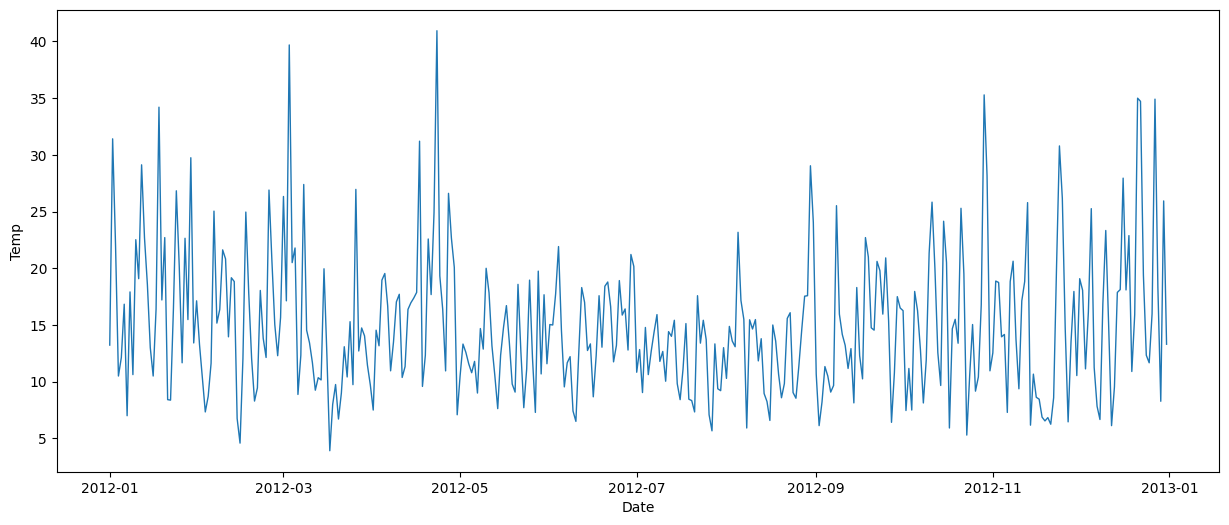

In [307]:
# Time Series plot
plt.figure(figsize = (15,6))
plt.plot(y,linewidth = 1)
plt.xlabel('Date')
plt.ylabel('Temp')
plt.show()

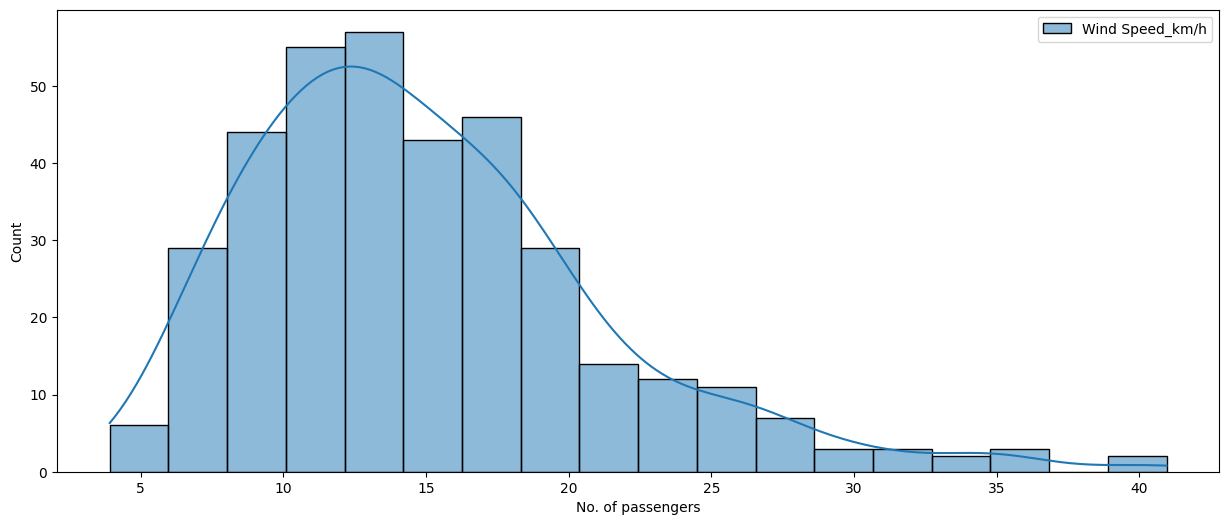

In [308]:
# Density Plot
plt.figure(figsize = (15,6))
sns.histplot(y, kde = True)
plt.xlabel('No. of passengers')
plt.ylabel('Count')
plt.show()

<Figure size 1800x800 with 0 Axes>

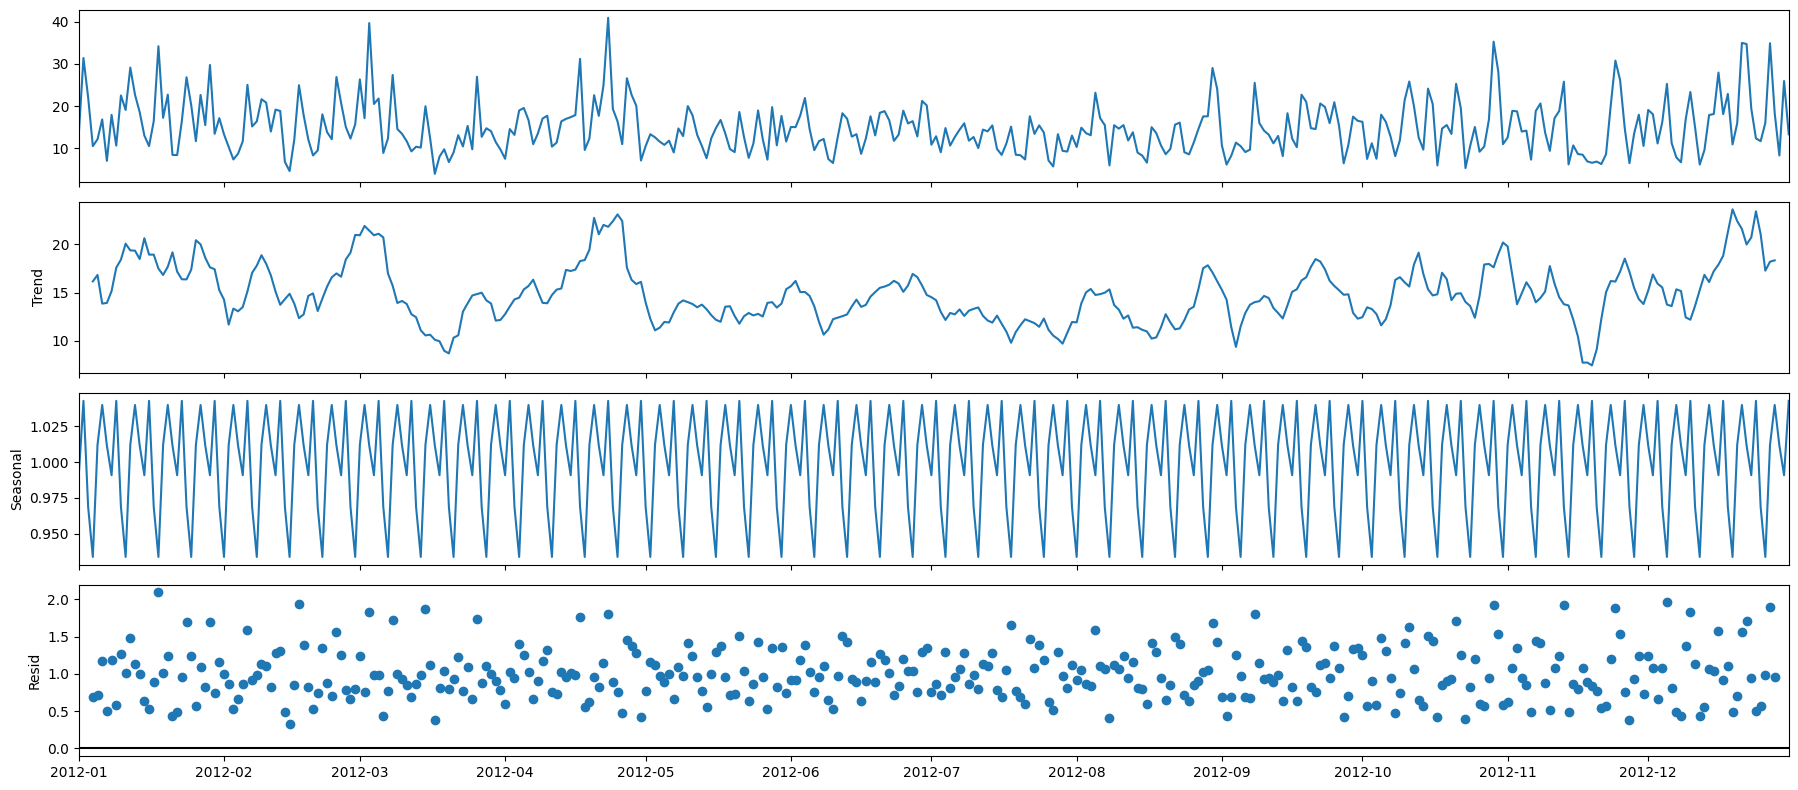

In [309]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model = 'multiplicative')
plt.figure(figsize = (18,8))
decomposition.plot()
plt.show()

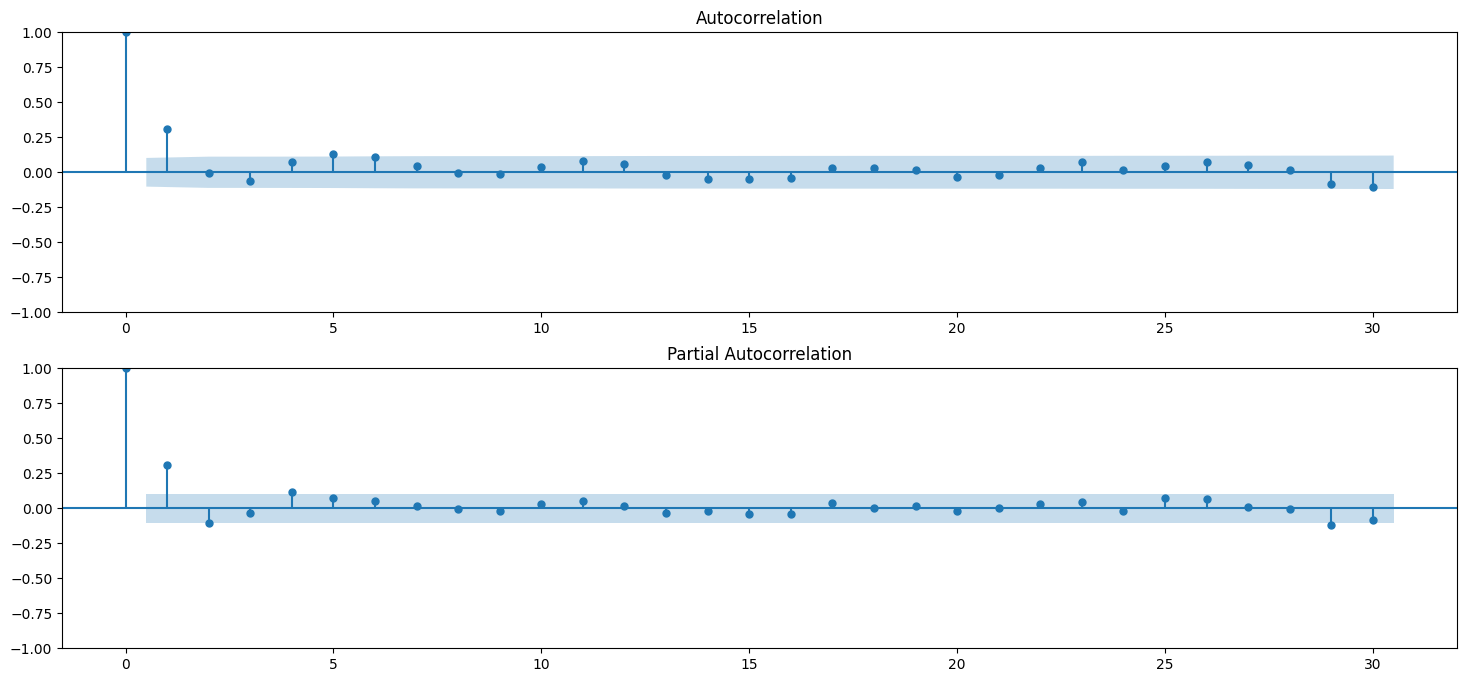

In [310]:
# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(y['Wind Speed_km/h'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(y['Wind Speed_km/h'], ax=plt.gca(), lags = 30)
plt.show()

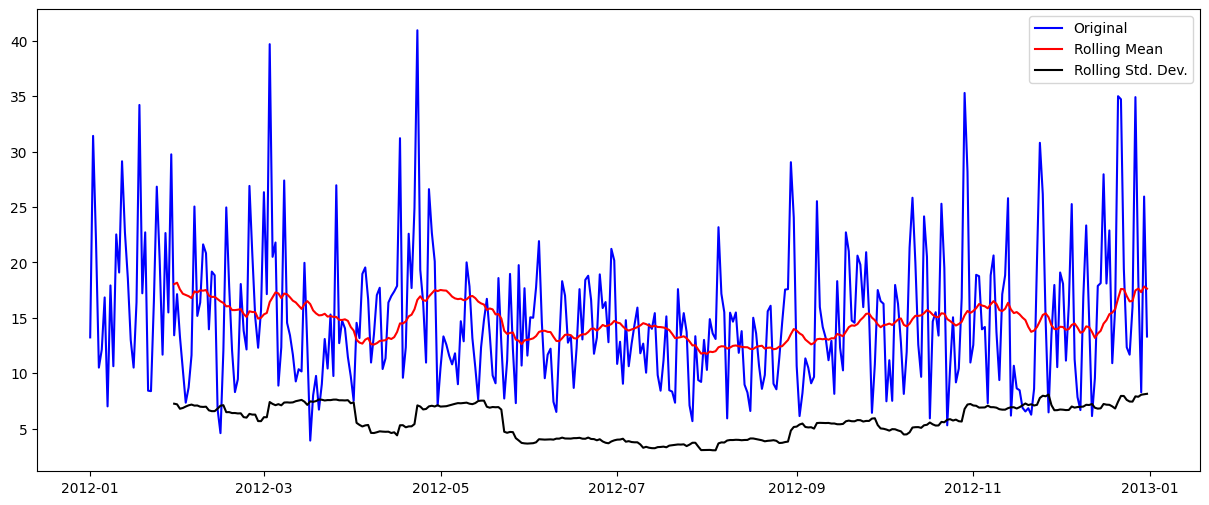

In [311]:
# Rolling Mean & Rolling Standard Deviation
rolmean = y.rolling(window = 30).mean()
rolstd = y.rolling(window = 30).std()

plt.figure(figsize = (15,6))
orig = plt.plot(y, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

**Stationarity Data**

In [312]:
# Augmented Dicky-Fuller Test
print('-------------Results of Dicky Fuller Test -------------')
dftest = adfuller(y['Wind Speed_km/h'], autolag = 'AIC')
dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                 'No. of Lags used', 'No. of observations used'])
for key,value in dftest[4].items():
    dfoutput[f'Critical Value ({key})'] = value
dfoutput['Maximized AIC:'] = dftest[5]
print(dfoutput)

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                        -6.985936e+00
p-value : MacKinnon's approximate p-value    7.968964e-10
No. of Lags used                             4.000000e+00
No. of observations used                     3.610000e+02
Critical Value (1%)                         -3.448595e+00
Critical Value (5%)                         -2.869580e+00
Critical Value (10%)                        -2.571053e+00
Maximized AIC:                               2.211059e+03
dtype: float64


Data tidak stationer karena p-value diatas 0,05

**Membuat Data Menjadi Stationer**

In [313]:
from statsmodels.tsa.stattools import adfuller
# Creating general function to test stationarity of a time series

def test_stationarity(timeseries):
    # Rolling Mean & Rolling Standard Deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    plt.figure(figsize = (15,6))
    orig = plt.plot(timeseries, color = 'blue', label ='Original')
    mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
    plt.legend(loc = 'best')
    plt.show()

    # Augmented Dicky-Fuller Test
    print('-------------Results of Dicky Fuller Test -------------')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                     'No. of Lags used', 'No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    dfoutput['Maximized AIC:'] = dftest[5]
    print(dfoutput)

In [314]:
df_log=np.sqrt(df['Wind Speed_km/h'])
df_diff=df_log.diff().dropna()

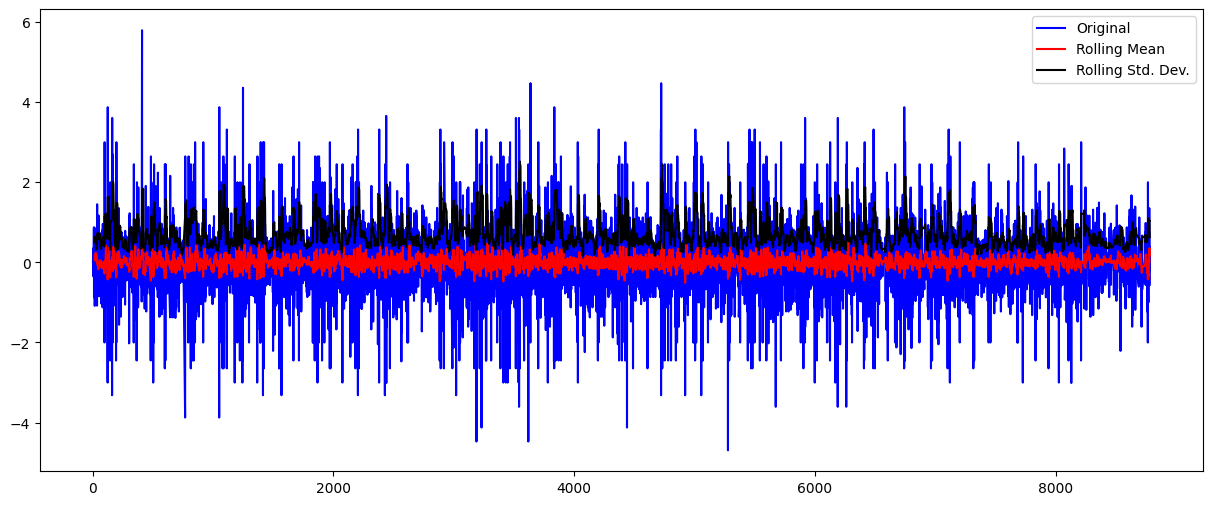

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                           -19.682873
p-value : MacKinnon's approximate p-value        0.000000
No. of Lags used                                37.000000
No. of observations used                      8250.000000
Critical Value (1%)                             -3.431143
Critical Value (5%)                             -2.861890
Critical Value (10%)                            -2.566957
Maximized AIC:                               18806.643996
dtype: float64


In [315]:
test_stationarity(df_diff)

Data sudah stationer karena p-value dibawah 0,05

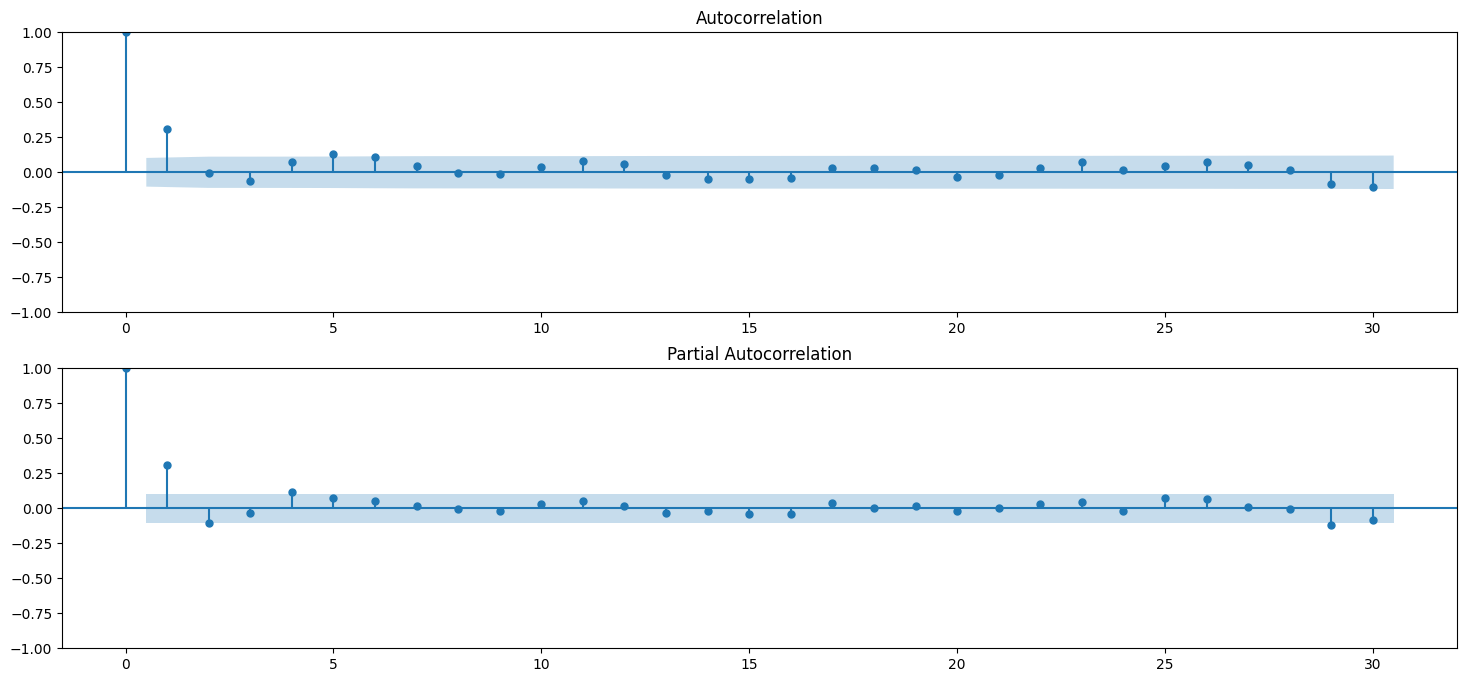

In [316]:
# Estimating p & q parameters from PACF & ACF plot resp.
plt.figure()
plt.subplot(211)
plot_acf(y['Wind Speed_km/h'], ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(y['Wind Speed_km/h'], ax=plt.gca(), lags = 30)
plt.show()

**Time Series Forecasting**

ARIMA

In [317]:
# Model 1
model1 = ARIMA(train_ts, order = (2,0,3))
results1 = model1.fit()

In [318]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Wind Speed_km/h   No. Observations:                  292
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -912.658
Date:                Sun, 17 Dec 2023   AIC                           1839.315
Time:                        02:36:05   BIC                           1865.052
Sample:                    01-01-2012   HQIC                          1849.624
                         - 10-18-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6778      0.975     15.056      0.000      12.767      16.588
ar.L1          0.5575      0.351      1.588      0.112      -0.131       1.246
ar.L2          0.4390      0.352      1.249      0.212      -0.250       1.128
ma.L1         -0.2517      0.748     -0.337      0.736      -1.717       1.214
ma.L2         -0.4980      0.597     -0.835      0.404      -1.667       0.671
ma.L3         -0.2501      0.189     -1.320      0.187      -0.621       0.121
sigma2        30.3216     19.301      1.571      0.116      -7.507      68.150
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               151.43
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                             1.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [319]:
arima1 = results1.forecast(steps = len(test_ts))

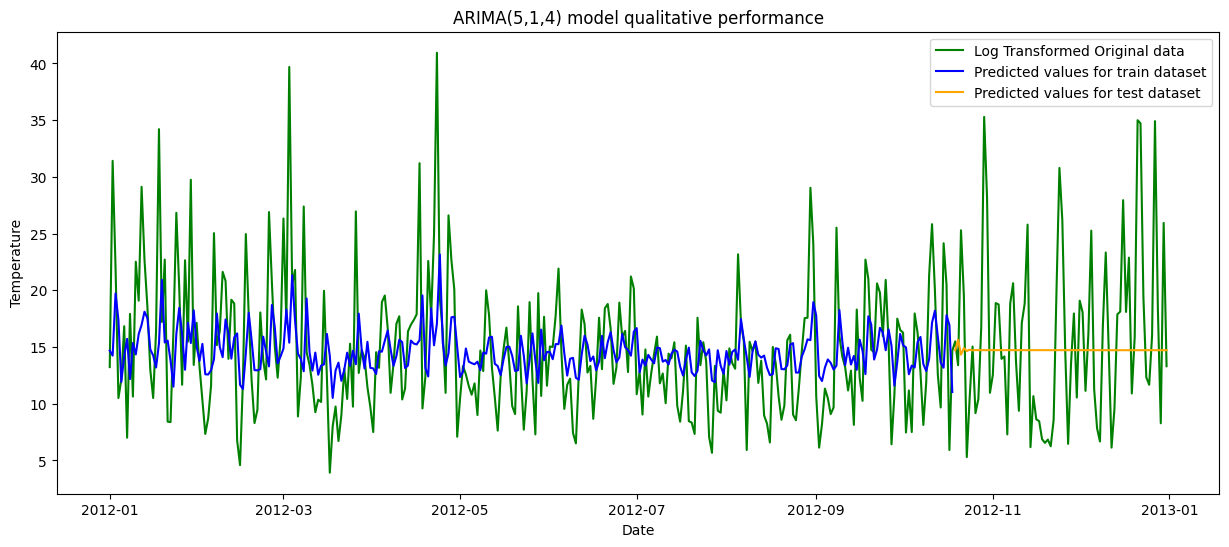

In [320]:
plt.figure(figsize = (15,6))
plt.plot(y, color = 'green', label = 'Log Transformed Original data')
plt.plot(results1.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(arima1, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA(5,1,4) model qualitative performance')
plt.legend(loc = 'best')
plt.show()

SARIMA

In [321]:
# Model 2
model2 = ARIMA(train_ts, order = (5,1,0), seasonal_order=(5,1,0,10))
results2 = model2.fit()

In [322]:
arima2 = results2.forecast(steps = len(test_ts))

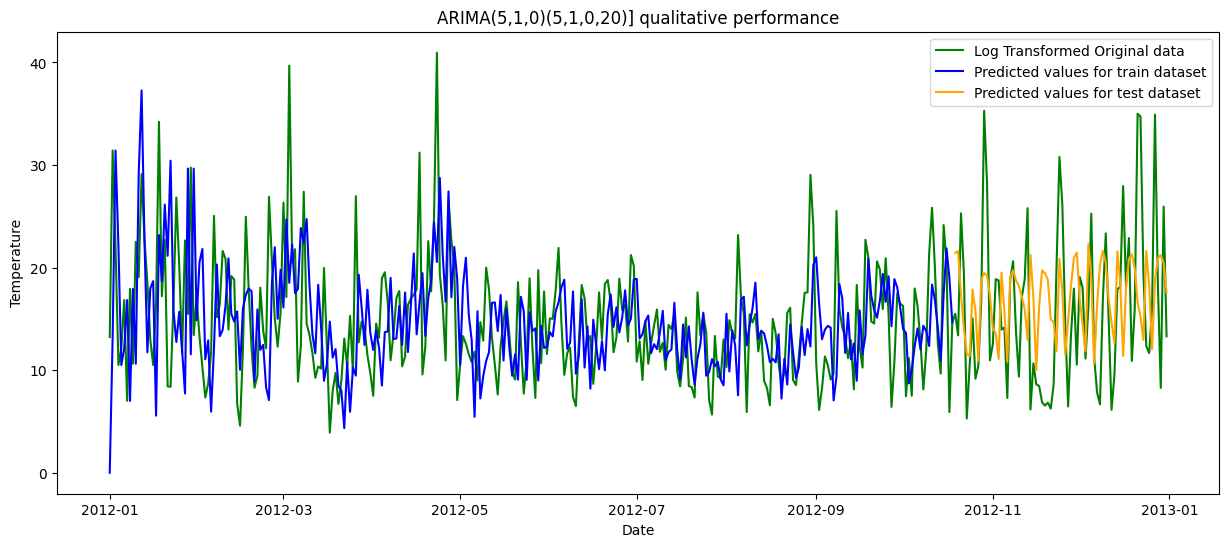

In [323]:
plt.figure(figsize = (15,6))
plt.plot(y, color = 'green', label = 'Log Transformed Original data')
plt.plot(results2.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(arima2, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA(5,1,0)(5,1,0,20)] qualitative performance')
plt.legend(loc = 'best')
plt.show()

Double Exponential Smoothing

In [324]:
double_exp = ExponentialSmoothing(train_ts, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=80, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(80)

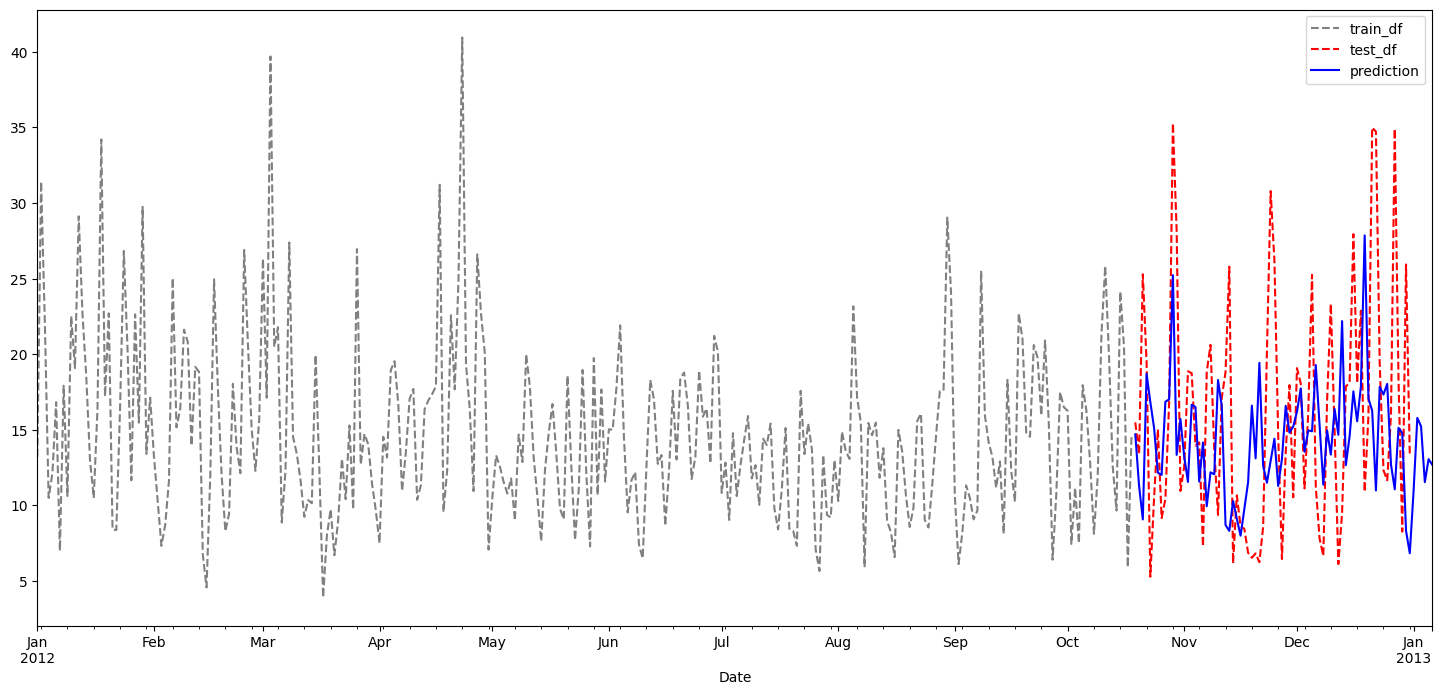

In [325]:
train_ts['Wind Speed_km/h'].plot(style='--', color='gray', legend=True, label='train_df')
test_ts['Wind Speed_km/h'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

Triple Exponential Smoothing

In [326]:
hw_model = ExponentialSmoothing(train_ts['Wind Speed_km/h'],
                          trend    ='add',
                          initialization_method='heuristic',
                          seasonal = "add",
                          seasonal_periods=100,
                          damped_trend=True).fit()
hw_train_pred =  hw_model.fittedvalues
hw_test_pred =  hw_model.forecast(80)

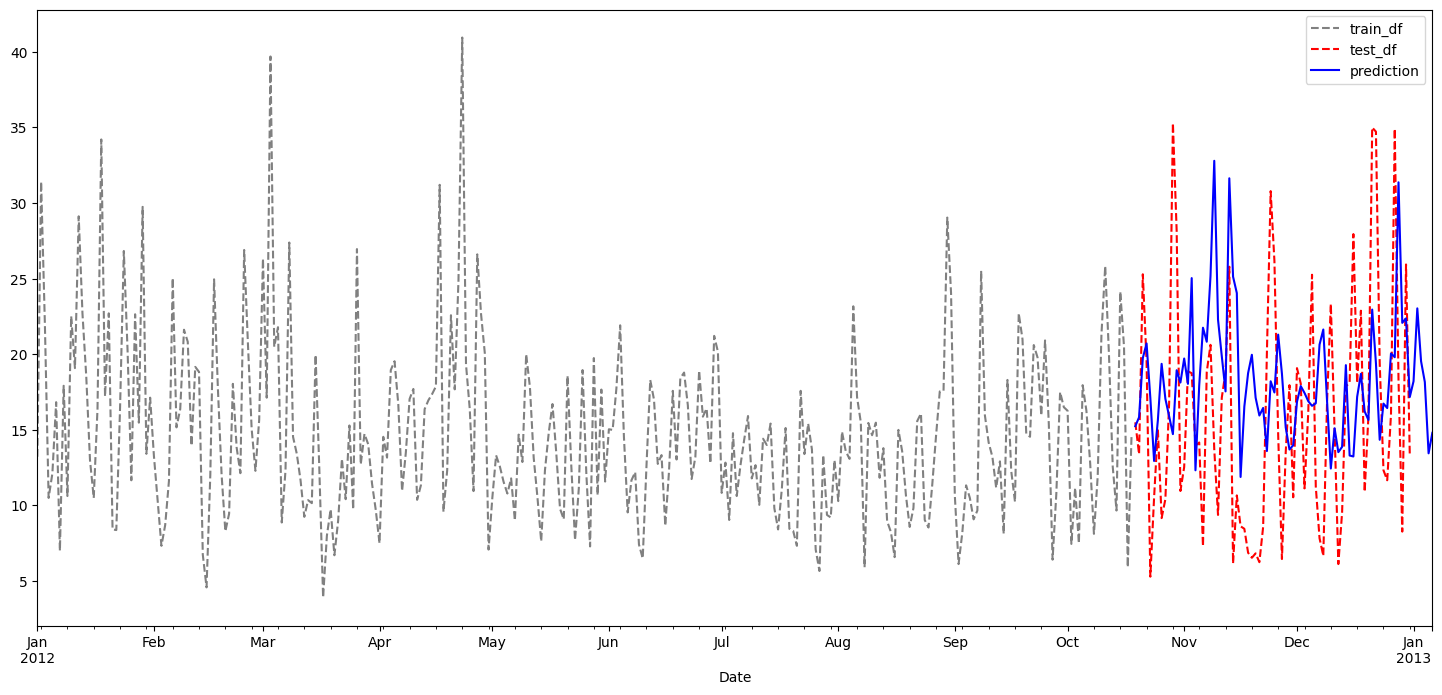

In [327]:
train_ts['Wind Speed_km/h'].plot(style='--', color='gray', legend=True, label='train_df')
test_ts['Wind Speed_km/h'].plot(style='--', color='r', legend=True, label='test_df')
hw_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

Implementasi Model Terbaik (Double Exponential Smoothing)

In [333]:
double_exp_model = ExponentialSmoothing(y['Wind Speed_km/h'], trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=80, damped_trend=False).fit()
double_exp_pred = double_exp_model.forecast(80)

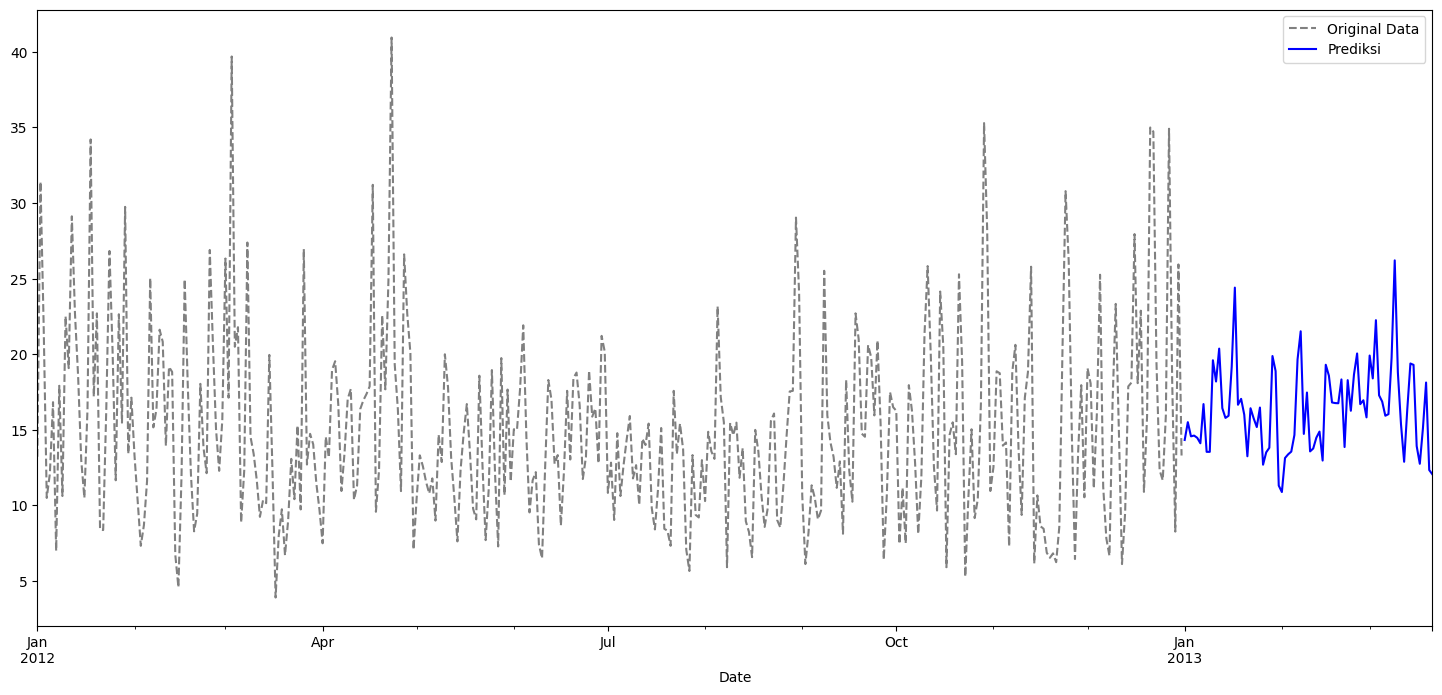

In [334]:
y['Wind Speed_km/h'].plot(style='--', color='gray', legend=True, label='Original Data')
double_exp_pred.plot(color='b', legend=True, label='Prediksi')
plt.show()

In [335]:
import pickle

pickle.dump(double_exp_model, open('Model_Prediksi.sav','wb'))